# Keras

**Content**
- Keras overview 
- Linear Regression Example on Boston Housing dataset

# Keras Overview 

Note: This is to run on colab 

**Deep Learning** is a branch of AI which uses Neural Networks for Machine Learning

Some popular **deep learning frameworks** at present are Tensorflow, Theano, Caffe, Pytorch, CNTK, MXNet, Torch, deeplearning4j, Caffe2 among many others.

**Keras** is a high-level API, written in Python and capable of running on top of TensorFlow, Theano, or CNTK. Keras provides a simple and modular API to create and train Neural Networks, hiding most of the complicated details under the hood.

The example of working model is linear NN with only FC layer and linear activation for regression for boston housing 



In [7]:
!pip install tensorflow

## Keras Workflow

In [2]:
!wget https://www.dropbox.com/s/znx4xmexgg08bkw/keras-workflow.jpeg?dl=0 -O ./supplementaty_data/keras-workflow.jpeg

--2021-09-29 08:43:17--  https://www.dropbox.com/s/znx4xmexgg08bkw/keras-workflow.jpeg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/znx4xmexgg08bkw/keras-workflow.jpeg [following]
--2021-09-29 08:43:18--  https://www.dropbox.com/s/raw/znx4xmexgg08bkw/keras-workflow.jpeg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucff4f87f11dd8a9996e851a30f4.dl.dropboxusercontent.com/cd/0/inline/BXFH5s4SEq8VSknWXuDcd3ecjx_m-0y4jmJcJkUCsB4GlqJCE0FzQx8u3eVtaCIH65RNYhV-TMZeyljWEOpZEx9jkDLhT6oo13H0BAyXRrsutt0PrDvEKDDYyDnNrTNyVxBJsIC18_APpmnpI6GbgWkw/file# [following]
--2021-09-29 08:43:18--  https://ucff4f87f11dd8a9996e851a30f4.dl.dropboxusercontent.com/cd/0/inline/BXFH5s4SEq8VSknWXuDcd3ecjx_m-0y4jmJcJkUCsB4GlqJCE0FzQx8u3eVta

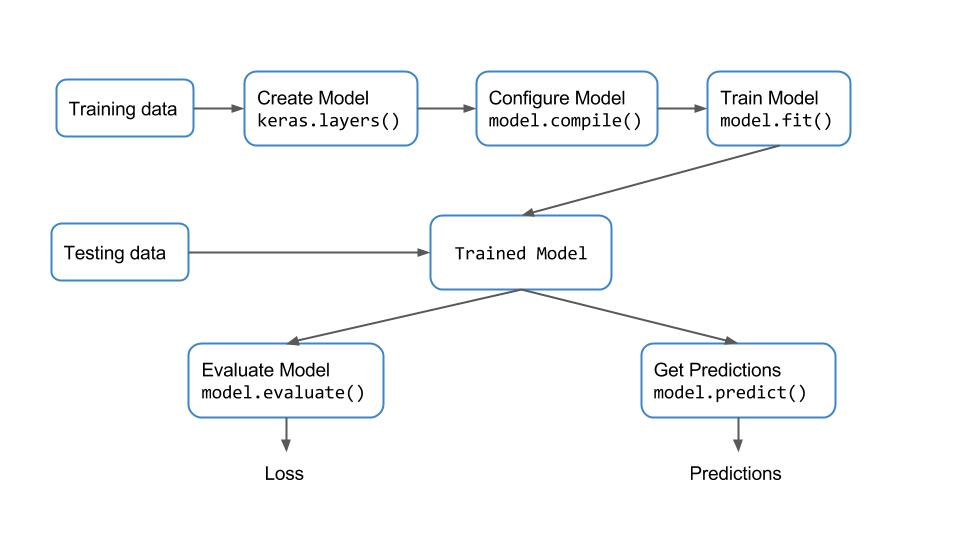

In [3]:
from IPython.display import Image
Image('./supplementaty_data/keras-workflow.jpeg')

## Keras Layers

Layers can be thought of as the building blocks of a Neural Network. They process the input data and produce different outputs, depending on the type of layer, which are then used by the layers which are connected to them.

Keras provides a number of core layers which include:
- Dense layers, also called fully connected layer, since, each node in the input is connected to every node in the output,
- Activation layer which includes activation functions like ReLU, tanh, sigmoid among others,
- Dropout layer – used for regularization during training,
- Flatten, Reshape, etc.

Apart from these core layers, some important layers are
- Convolution layers – used for performing convolution,
- Pooling layers – used for down sampling,
- Recurrent layers,
- Locally-connected, normalization, etc.


In [1]:
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D

2024-01-29 19:28:25.253722: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-29 19:28:25.316008: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-29 19:28:25.317969: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-29 19:28:26.654505: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Keras Models
Keras provides two ways to define a model:
<br> - Sequential, used for stacking up layers(most commonly used)
<br> - Functional API, used for designing complex model architectures like models with multiple-outputs, shared layers etc

In [2]:
from keras.models import Sequential

For creating a Sequential model, we can either pass the list of layers as an argument to the constructor or add the layers sequentially using the model.add() function.
For example, both the code snippets for creating a model with a single dense layer with 10 outputs are equivalent.

In [3]:
nFeatures = 100 # lets initialize with some value 
model = Sequential([Dense(10, input_shape=(nFeatures,)), 
                    Activation('linear') ])

2024-01-29 19:28:33.199830: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-29 19:28:33.239660: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


The above gives the same result as  the following

In [4]:
model = Sequential()
model.add(Dense(10, input_shape=(nFeatures,)))
model.add(Activation('linear'))

## Compiling 

Training requires to specify  the following parameters: 
- **Optimizer** which determines how the network weights are updated
- **Ccost function** (loss function)
- **Metrics** to evaluate during training and testing

This is done in Keras using the `model.compile()` function. The following code snippet shows the usage.

**Note**: The mandatory parameters to be specified are 
    <br>- the optimizer 
    <br>- the loss function.

In [5]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse', 'mae'])

### Optimizers

Keras provides a lot of optimizers to choose from, which include
- Stochastic Gradient Descent ( SGD ),
- Adam,
- RMSprop,
- AdaGrad,
- AdaDelta, etc.

RMSprop is a good choice of optimizer for most problems.

### Loss functions

In a supervised learning problem, we have to find the error between the actual values and the predicted value. There can be different metrics which can be used to evaluate this error. This metric is often called loss function or cost function or objective function. There can be more than one loss function depending on what you are doing with the error. In general, we use
- binary-cross-entropy for a binary classification problem,
- categorical-cross-entropy for a multi-class classification problem,
- mean-squared-error for a regression problem and so on.

## Training
Once the model is configured, we can start the training process. 
This can be done using the `model.fit()` function in Keras. 

Specify the training data, batch size and number of epochs. 
<br>Keras automatically figures out how to pass the data iteratively to the optimizer for the number of epochs specified.

`model.fit(trainFeatures, trainLabels, batch_size=4, epochs = 100)`


## Evaluating the model

Evaluation can be with the help of  `model.evaluate()` in Keras.
It finds the loss and metrics specified in the `model.compile()` 


## Predicting

Inference can be done with the help of `model.predict()` 

# Linear Regression Example

Create a simple network with a single layer to perform linear regression. 
<br>It uses the [Boston Housing dataset](https://keras.io/datasets/) available in Keras as an example. 
<br>Samples contain 13 attributes of houses at different locations around the Boston suburbs in the late 1970s. <br>Targets are the median values of the houses at a location (in k$). 
<br>Using 13 features, the trained model will predict the price of the house in the test data.



## Review the data 

In [6]:
from tensorflow.keras.datasets import boston_housing

(X_train, Y_train), (X_test, Y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 1us/step


In [7]:
print ('X_train.shape= ',  X_train.shape)
print ('Y_train.shape= ',  Y_train.shape)
print ('X_test.shape= ',  X_test.shape)
print ('Y_test.shape= ',  Y_test.shape)

index = 1 
print ('\nReview sample. \nX_train[{0}]:\n{1},\nY_train[{0}]= {2}'.format (index, X_train[index],Y_train[index] ))



X_train.shape=  (404, 13)
Y_train.shape=  (404,)
X_test.shape=  (102, 13)
Y_test.shape=  (102,)

Review sample. 
X_train[1]:
[2.1770e-02 8.2500e+01 2.0300e+00 0.0000e+00 4.1500e-01 7.6100e+00
 1.5700e+01 6.2700e+00 2.0000e+00 3.4800e+02 1.4700e+01 3.9538e+02
 3.1100e+00],
Y_train[1]= 42.3


##  Build the model

- **Sequential model** is used to create the network graph. 
- **Dense layer** is added. It contains the number of inputs equal to the number of features in the data and a single output. 

In [8]:
from keras.models import Sequential 
from keras.layers import Dense

nFeatures = X_train.shape[1]

# use the Sequential model to create the network graph
model = Sequential()

# add a Dense layer with the number of inputs equal to the number of features in the data and a single output
model.add(Dense(1, input_shape=(nFeatures,), activation='linear')) # guess you need to add the comma in case of single dimmension
# e.g. # X_train shape: (1080, 64, 64, 3) -> input_shape = (64, 64, 3)

## Review the model 
`model.summary()` function is used to check the configuration of the model. 
<br>It shows 14 parameters: 13 parameters for the weights and 1 for the bias.

In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 14        
                                                                 
Total params: 14 (56.00 Byte)
Trainable params: 14 (56.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile and train the model  


In [10]:
# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse', 'mae'])

# train it
model.fit(X_train, Y_train, batch_size=4, epochs=1000)


Epoch 1/1000
101/101 [==============================] - 1s 2ms/step - loss: 4303.4043 - mse: 4303.4043 - mae: 54.2832
Epoch 2/1000
101/101 [==============================] - 0s 3ms/step - loss: 2898.7324 - mse: 2898.7324 - mae: 43.5223
Epoch 3/1000
101/101 [==============================] - 0s 2ms/step - loss: 1814.8190 - mse: 1814.8190 - mae: 34.1395
Epoch 4/1000
101/101 [==============================] - 0s 2ms/step - loss: 1019.5070 - mse: 1019.5070 - mae: 25.1529
Epoch 5/1000
101/101 [==============================] - 0s 2ms/step - loss: 504.0564 - mse: 504.0564 - mae: 17.3180
Epoch 6/1000
101/101 [==============================] - 0s 2ms/step - loss: 273.8368 - mse: 273.8368 - mae: 12.7450
Epoch 7/1000
101/101 [==============================] - 0s 4ms/step - loss: 189.6178 - mse: 189.6178 - mae: 10.7041
Epoch 8/1000
101/101 [==============================] - 0s 2ms/step - loss: 159.9988 - mse: 159.9988 - mae: 9.8338
Epoch 9/1000
101/101 [==============================] - 0s 1ms/st

## 4.2. Evaluation 

Test  (unseen) data is used for  prediction.

In [11]:
model.evaluate(X_test, Y_test, verbose=True)

4/4 [==============================] - 0s 5ms/step - loss: 26.5249 - mse: 26.5249 - mae: 3.7911


[26.52494239807129, 26.52494239807129, 3.79105806350708]

## Inference  

Predictions on test data is computed using  the `model.predict()` function. 
<br>Here are ground truth values with the predictions from the model for the first 5 test samples.

In [12]:
import pandas as pd 
Y_pred = model.predict(X_test)
 
df = pd.DataFrame ({'Y_test': Y_test[:10],'Y_pred': Y_pred[:10,0]}) 
df

4/4 [==============================] - 0s 3ms/step


,Y_test,Y_pred
0,7.2,7.551764
1,18.8,17.406553
2,19.0,20.366009
3,27.0,28.629208
4,22.2,22.745153
5,24.5,19.316021
6,31.2,27.961452
7,22.9,22.570667
8,20.5,17.387558
9,23.2,19.521349


In [13]:
df['Y_test'].corr(df['Y_pred'])

0.9267983579246183

[source](https://www.learnopencv.com/deep-learning-using-keras-the-basics/)